 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_path = Path("Resource/whale_returns.csv")

whale_data = pd.read_csv(whale_path, index_col='Date', parse_dates=True, infer_datetime_format=True)

whale_data.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
whale_data.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
whale_data = whale_data.dropna()
whale_data.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_path = Path("Resource/algo_returns.csv")

algo_data = pd.read_csv(algo_path, index_col='Date', parse_dates=True, infer_datetime_format=True)

algo_data.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [6]:
# Count nulls
algo_data.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_data = algo_data.dropna()
algo_data

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
sp500_path = Path("Resource/sp500_history.csv")

sp500_data = pd.read_csv(sp500_path, index_col='Date', parse_dates=True, infer_datetime_format=True)

sp500_data.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [9]:
# Check Data Types
sp500_data.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types
sp500_data['Close'] = sp500_data['Close'].str.replace('$','').astype(float)

In [11]:
sp500_data.sort_index(inplace=True)  
sp500_data.head()

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [12]:
# Calculate Daily Returns
sp500_daily_returns = sp500_data.pct_change()

In [13]:
sp500_daily_returns.isnull().sum()

Close    1
dtype: int64

In [14]:
# Drop nulls

sp500_daily_returns = sp500_daily_returns.dropna()
sp500_daily_returns.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [15]:
# Rename `Close` Column to be specific to this portfolio.
sp500_daily_returns = sp500_daily_returns.rename(columns = {'Close':'S&P 500'})

## Combine Whale, Algorithmic, and S&P 500 Returns

In [16]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
daily_returns = pd.concat([whale_data, algo_data, sp500_daily_returns], axis=1, join='inner')
daily_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944
...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579


---

In [17]:
daily_returns.sort_index(inplace=True)  
daily_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

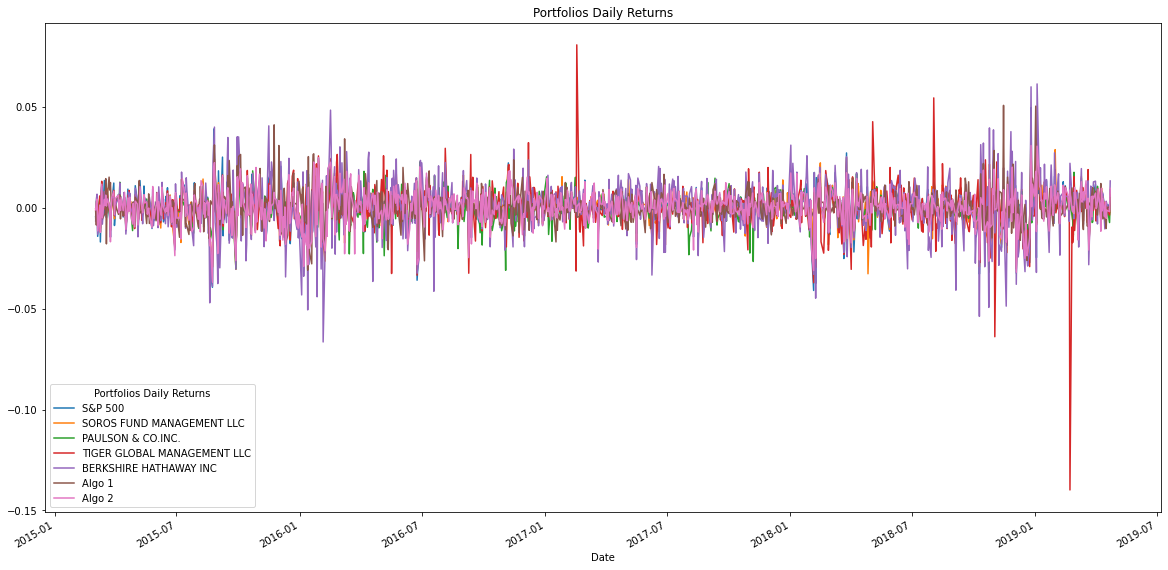

In [18]:
# Plot daily returns of all portfolios
ax = daily_returns['S&P 500'].plot(figsize=(20,10), title='Portfolios Daily Returns')

daily_returns['SOROS FUND MANAGEMENT LLC'].plot(ax=ax)
daily_returns['PAULSON & CO.INC. '].plot(ax=ax)
daily_returns['TIGER GLOBAL MANAGEMENT LLC'].plot(ax=ax)
daily_returns['BERKSHIRE HATHAWAY INC'].plot(ax=ax)
daily_returns['Algo 1'].plot(ax=ax)
daily_returns['Algo 2'].plot(ax=ax)


ax.legend(['S&P 500', 'SOROS FUND MANAGEMENT LLC', 'PAULSON & CO.INC. ', 'TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC','Algo 1','Algo 2'], title='Portfolios Daily Returns');

#### Calculate and Plot cumulative returns.

In [19]:
# Calculate cumulative returns of all portfolios

cumulative_SP500_returns = (1 + daily_returns['S&P 500']).cumprod()
cumulative_SOROS_returns = (1 + daily_returns['SOROS FUND MANAGEMENT LLC']).cumprod()
cumulative_PAULSON_returns = (1 + daily_returns['PAULSON & CO.INC. ']).cumprod()
cumulative_TIGER_returns = (1 + daily_returns['TIGER GLOBAL MANAGEMENT LLC']).cumprod()
cumulative_BERKSHIRE_returns = (1 + daily_returns['BERKSHIRE HATHAWAY INC']).cumprod()
cumulative_Algo1_returns = (1 + daily_returns['Algo 1']).cumprod()
cumulative_Algo2_returns = (1 + daily_returns['Algo 1']).cumprod()

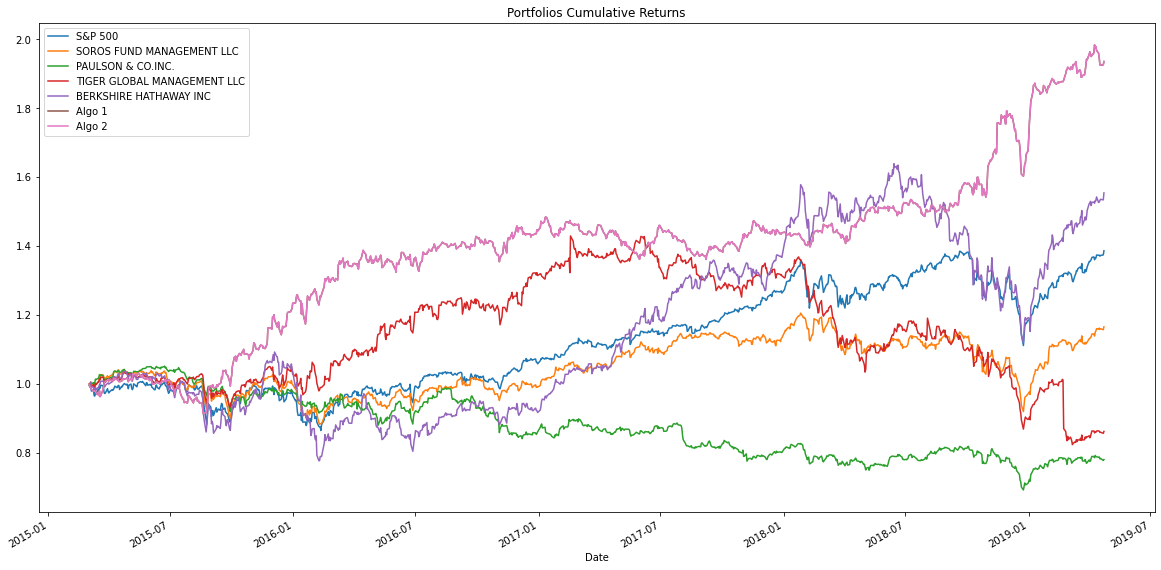

In [20]:
# Plot cumulative returns
ax1 = cumulative_SP500_returns.plot(figsize=(20,10), title='Portfolios Cumulative Returns')

cumulative_SOROS_returns.plot(ax=ax1)
cumulative_PAULSON_returns.plot(ax=ax1)
cumulative_TIGER_returns.plot(ax=ax1)
cumulative_BERKSHIRE_returns.plot(ax=ax1)
cumulative_Algo1_returns.plot(ax=ax1)
cumulative_Algo2_returns.plot(ax=ax1)


ax1.legend(['S&P 500', 'SOROS FUND MANAGEMENT LLC', 'PAULSON & CO.INC. ', 'TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC','Algo 1','Algo 2']);

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:title={'center':'Daily Returns Boxplot'}>

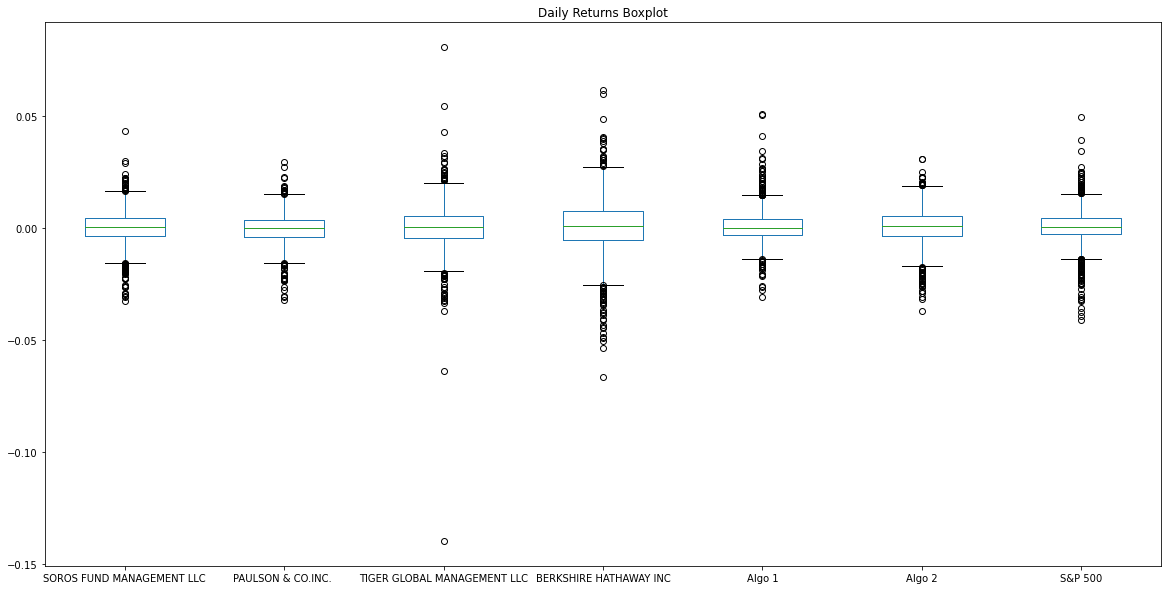

In [21]:
# Box plot to visually show risk
daily_returns.plot.box(figsize=(20,10), title='Daily Returns Boxplot')

### Calculate Standard Deviations

In [22]:
# Calculate the daily standard deviations of all portfolios
daily_return_port = daily_returns[['SOROS FUND MANAGEMENT LLC', 'PAULSON & CO.INC. ', 'TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC','Algo 1','Algo 2']]
daily_return_port_std = daily_return_port.std()
daily_return_port_std

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [23]:
# Calculate  the daily standard deviation of S&P 500
daily_return_sp500 = daily_returns[['S&P 500']]
daily_return_sp500_std = daily_return_sp500.std()
daily_return_sp500_std

# Determine which portfolios are riskier than the S&P 500
high_risk_ports = []
low_risk_ports = []

for port, std in daily_return_port_std.items():
    if std > daily_return_sp500_std[0]:
        high_risk_ports.append([port, std])
    elif std < daily_return_sp500_std[0]:
        low_risk_ports.append([port, std])
        
if len(high_risk_ports) > 0:
    print('The portfolios that are riskier than the S&P 500 are:')
    print('----------------------------------------------------')
    for p in high_risk_ports:
        print(p)
else:
    print(f'The S&P 500 ({daily_return_sp500_std[0]}) is risker than all the portfolios')
    

The portfolios that are riskier than the S&P 500 are:
----------------------------------------------------
['TIGER GLOBAL MANAGEMENT LLC', 0.010893969618743032]
['BERKSHIRE HATHAWAY INC', 0.012918618441883524]


### Calculate the Annualized Standard Deviation

In [24]:
# Calculate the annualized standard deviation (252 trading days)
daily_returns_std = daily_returns.std()
daily_returns_std
annualized_std = daily_returns_std * np.sqrt(252)
annualized_std

annualized_std.sort_values(inplace=True)  
annualized_std

PAULSON & CO.INC.              0.111488
Algo 1                         0.120967
SOROS FUND MANAGEMENT LLC      0.125335
Algo 2                         0.132430
S&P 500                        0.135786
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'Daily Returns STD 21-day window'}, xlabel='Date'>

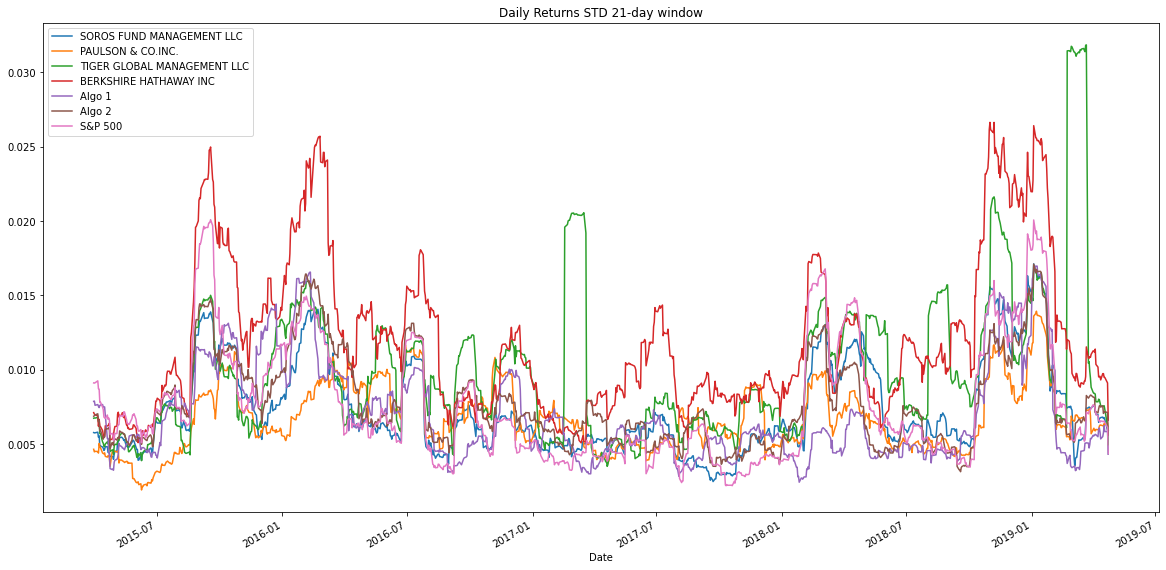

In [25]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
daily_returns_rolling_std_21d  = daily_returns.rolling(window=21).std()
# Plot the rolling standard deviation
daily_returns_rolling_std_21d.plot(figsize=(20,10), title='Daily Returns STD 21-day window')

### Calculate and plot the correlation

<AxesSubplot:>

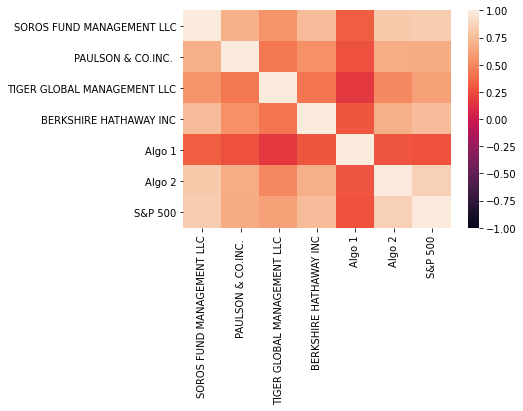

In [26]:
# Calculate the correlation
daily_return_correlation = daily_returns.corr()
# Display de correlation matrix
sns.heatmap(daily_return_correlation, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:title={'center':'Rolling 60-Day Beta of SOROS FUND MANAGEMENT LLC'}, xlabel='Date'>

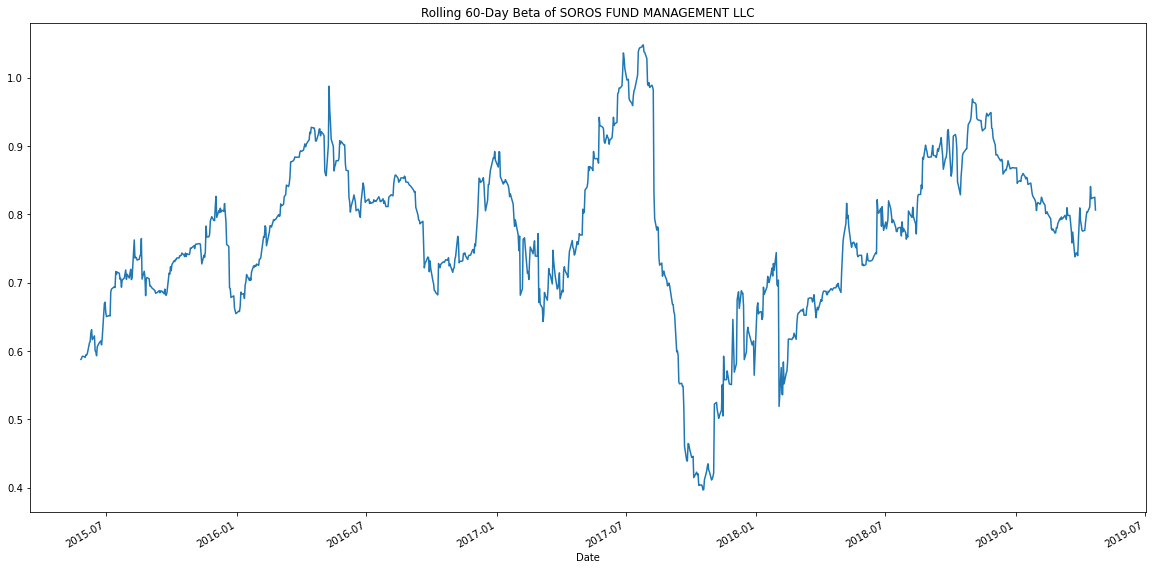

In [27]:
# Calculate covariance of a single portfolio
rolling_covariance = daily_returns['SOROS FUND MANAGEMENT LLC'].rolling(window=60).cov(daily_returns['S&P 500'])
rolling_covariance

# Calculate variance of S&P 500
rolling_variance = daily_returns['S&P 500'].rolling(window=60).var()
rolling_variance

# Computing beta
rolling_beta = rolling_covariance / rolling_variance
rolling_beta

# Plot beta trend
rolling_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of SOROS FUND MANAGEMENT LLC')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:title={'center':'Daily Returns EWA 21-day window'}, xlabel='Date'>

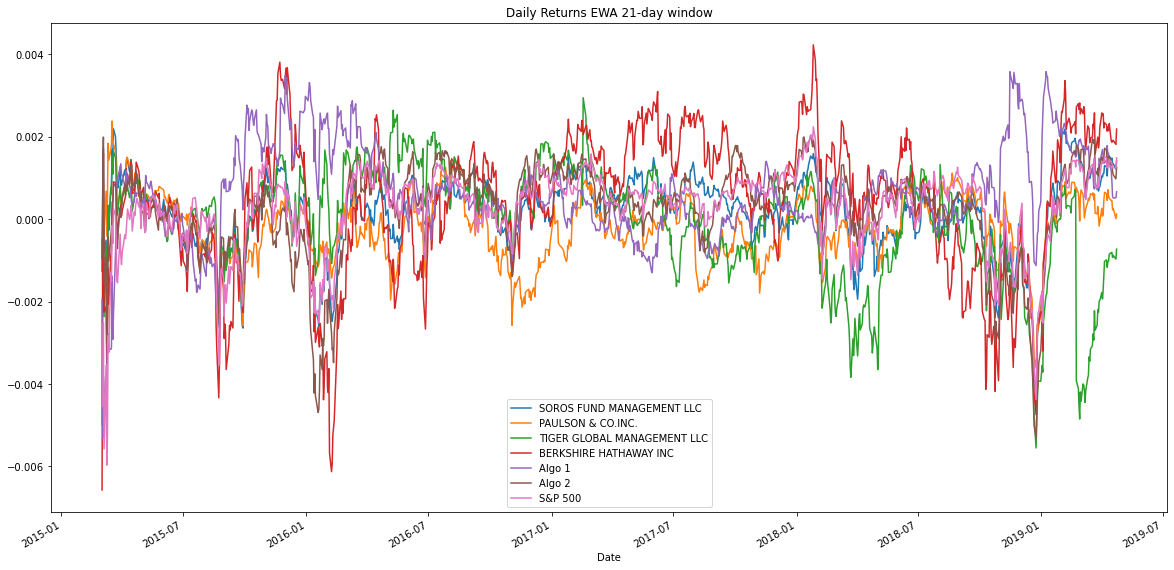

In [28]:
# Use `ewm` to calculate the rolling window
rolling_ewa = daily_returns.ewm(halflife=21).mean()
rolling_ewa

rolling_ewa.plot(figsize=(20,10), title='Daily Returns EWA 21-day window')

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [29]:
# Annualized Sharpe Ratios
sharpe_ratios = (daily_returns.mean() * 252) / (daily_returns.std() * np.sqrt(252))
sharpe_ratios

Algo 1                         2.614209
TIGER GLOBAL MANAGEMENT LLC    3.715893
PAULSON & CO.INC.              4.296740
BERKSHIRE HATHAWAY INC         4.455893
Algo 2                         4.847528
SOROS FUND MANAGEMENT LLC      5.001465
S&P 500                        5.021171
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratio'}>

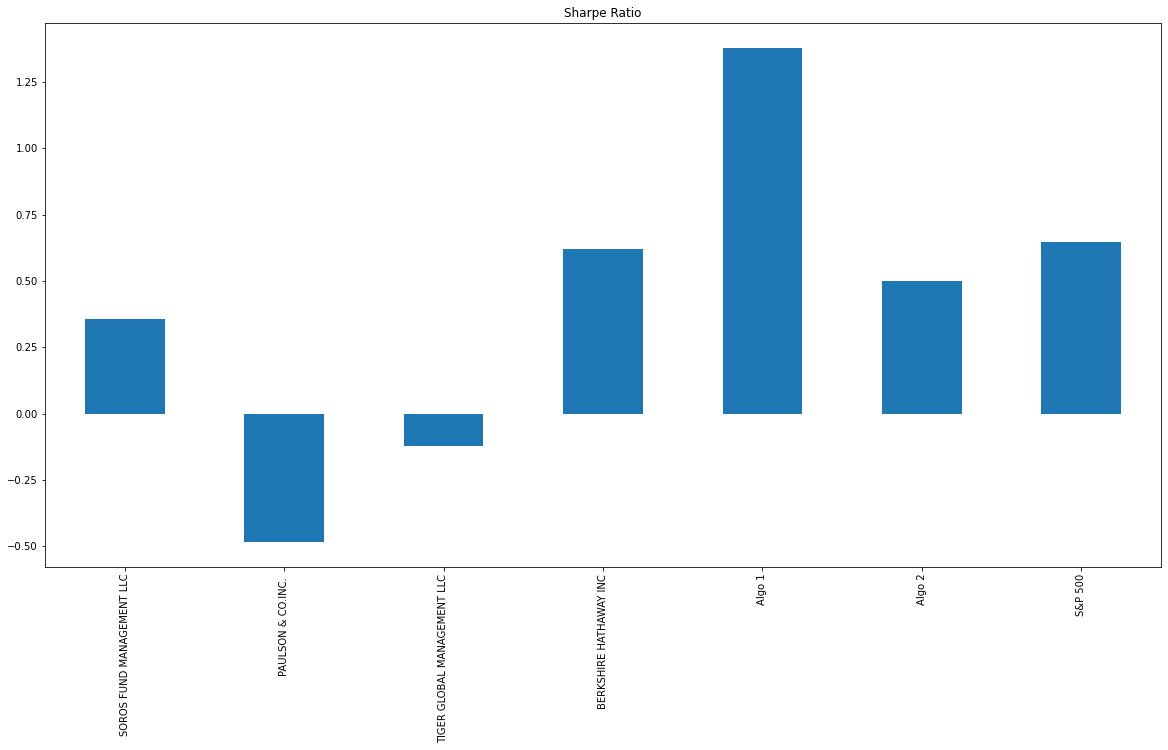

In [74]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind='bar',title='Sharpe Ratio',figsize=(20,10))

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---
- Algo 1 outperformed both the market (S&P 500) and the whales portfolios.
- Algo 2 outperformed just whales portfolios
---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [32]:
# Reading data from 1st stock
goog_path = Path("Resource/goog_historical.csv")

goog_data = pd.read_csv(goog_path, index_col='Trade DATE', parse_dates=True, infer_datetime_format=True)

goog_data.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,GOOG,1162.38
2019-05-08,GOOG,1166.27
2019-05-07,GOOG,1174.10
2019-05-06,GOOG,1189.39
2019-05-03,GOOG,1185.40


In [33]:
# Rename Column to be specific to this portfolio.
goog_data.sort_index(inplace=True) 
goog_data.head()
goog_data = goog_data.rename(columns = {'NOCP':'GOOG'})
goog_data = goog_data[['GOOG']]
goog_data.head()

,GOOG
Trade DATE,
2018-05-11,1098.26
2018-05-14,1100.20
2018-05-15,1079.23
2018-05-16,1081.77
2018-05-17,1078.59


In [34]:
goog_data.isnull().sum()

GOOG    0
dtype: int64

In [35]:
# Reading data from 2nd stock
aapl_path = Path("Resource/aapl_historical.csv")

aapl_data = pd.read_csv(aapl_path, index_col='Trade DATE', parse_dates=True, infer_datetime_format=True)

aapl_data.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,AAPL,200.72
2019-05-08,AAPL,202.90
2019-05-07,AAPL,202.86
2019-05-06,AAPL,208.48
2019-05-03,AAPL,211.75


In [36]:
# Rename Column to be specific to this portfolio.
aapl_data.sort_index(inplace=True) 
aapl_data.head()
aapl_data = aapl_data.rename(columns = {'NOCP':'AAPL'})
aapl_data = aapl_data[['AAPL']]
aapl_data.head()

,AAPL
Trade DATE,
2018-05-11,188.59
2018-05-14,188.15
2018-05-15,186.44
2018-05-16,188.18
2018-05-17,186.99


In [37]:
aapl_data.isnull().sum()

AAPL    0
dtype: int64

In [38]:
# Reading data from 3rd stock
cost_path = Path("Resource/goog_historical.csv")

cost_data = pd.read_csv(cost_path, index_col='Trade DATE', parse_dates=True, infer_datetime_format=True)

cost_data.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,GOOG,1162.38
2019-05-08,GOOG,1166.27
2019-05-07,GOOG,1174.10
2019-05-06,GOOG,1189.39
2019-05-03,GOOG,1185.40


In [39]:
# Rename Column to be specific to this portfolio.
cost_data.sort_index(inplace=True) 
cost_data.head()
cost_data = cost_data.rename(columns = {'NOCP':'COST'})
cost_data = cost_data[['COST']]
cost_data.head()

,COST
Trade DATE,
2018-05-11,1098.26
2018-05-14,1100.20
2018-05-15,1079.23
2018-05-16,1081.77
2018-05-17,1078.59


In [40]:
cost_data.isnull().sum()

COST    0
dtype: int64

In [41]:
# Combine all stocks in a single DataFrame
daily_returns_custom = pd.concat([goog_data, aapl_data, cost_data], axis=1, join='inner')
daily_returns_custom

,GOOG,AAPL,COST
Trade DATE,,,
2018-05-11,1098.26,188.59,1098.26
2018-05-14,1100.20,188.15,1100.20
2018-05-15,1079.23,186.44,1079.23
2018-05-16,1081.77,188.18,1081.77
2018-05-17,1078.59,186.99,1078.59
...,...,...,...
2019-05-03,1185.40,211.75,1185.40
2019-05-06,1189.39,208.48,1189.39
2019-05-07,1174.10,202.86,1174.10


In [44]:
daily_returns_custom.rename_axis(index={'Trade DATE':'DATE'}, inplace=True)

In [45]:
# Reset Date index
#daily_returns_custom.resetindex()

In [46]:
# Reorganize portfolio data by having a column per symbol
daily_returns_custom.head()

,GOOG,AAPL,COST
DATE,,,
2018-05-11,1098.26,188.59,1098.26
2018-05-14,1100.20,188.15,1100.20
2018-05-15,1079.23,186.44,1079.23
2018-05-16,1081.77,188.18,1081.77
2018-05-17,1078.59,186.99,1078.59


In [47]:
# Calculate daily returns
daily_returns_custom = daily_returns_custom.pct_change()

# Drop NAs
#daily_returns_custom.isnull().sum()
daily_returns_custom = daily_returns_custom.dropna()

# Display sample data
daily_returns_custom.head()

,GOOG,AAPL,COST
DATE,,,
2018-05-14,0.001766,-0.002333,0.001766
2018-05-15,-0.019060,-0.009088,-0.019060
2018-05-16,0.002354,0.009333,0.002354
2018-05-17,-0.002940,-0.006324,-0.002940
2018-05-18,-0.011339,-0.003637,-0.011339


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [48]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
custom_portfolio_returns = daily_returns_custom.dot(weights)
custom_portfolio_returns = pd.DataFrame(custom_portfolio_returns)
custom_portfolio_returns.rename(columns = {0:'Custom'}, inplace=True)
# Display sample data
custom_portfolio_returns.head()

,Custom
DATE,
2018-05-14,0.000400
2018-05-15,-0.015736
2018-05-16,0.004680
2018-05-17,-0.004068
2018-05-18,-0.008771


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [49]:
# Join your returns DataFrame to the original returns DataFrame
daily_returns = pd.concat([daily_returns, custom_portfolio_returns], axis=1, join='inner')
daily_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884,0.000400
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842,-0.015736
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061,0.004680
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856,-0.004068
2018-05-18,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632,-0.008771
...,...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,0.003326
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,0.011495
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579,0.001214
2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012,0.007820


In [61]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
daily_returns = daily_returns.dropna()
daily_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884,0.000400
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842,-0.015736
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061,0.004680
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856,-0.004068
2018-05-18,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632,-0.008771
...,...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,0.003326
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,0.011495
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579,0.001214
2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012,0.007820


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [62]:
# Calculate the annualized `std`
daily_returns_std1 = daily_returns.std()
daily_returns_std1


SOROS FUND MANAGEMENT LLC      0.009240
PAULSON & CO.INC.              0.007353
TIGER GLOBAL MANAGEMENT LLC    0.014648
BERKSHIRE HATHAWAY INC         0.015569
Algo 1                         0.008423
Algo 2                         0.008791
S&P 500                        0.009578
Custom                         0.015706
dtype: float64

In [63]:
annualized_std1 = daily_returns_std1 * np.sqrt(252)
annualized_std1.sort_values(inplace=True)  
annualized_std1

PAULSON & CO.INC.              0.116732
Algo 1                         0.133704
Algo 2                         0.139556
SOROS FUND MANAGEMENT LLC      0.146675
S&P 500                        0.152054
TIGER GLOBAL MANAGEMENT LLC    0.232531
BERKSHIRE HATHAWAY INC         0.247155
Custom                         0.249324
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'Daily Returns STD 21-day window'}>

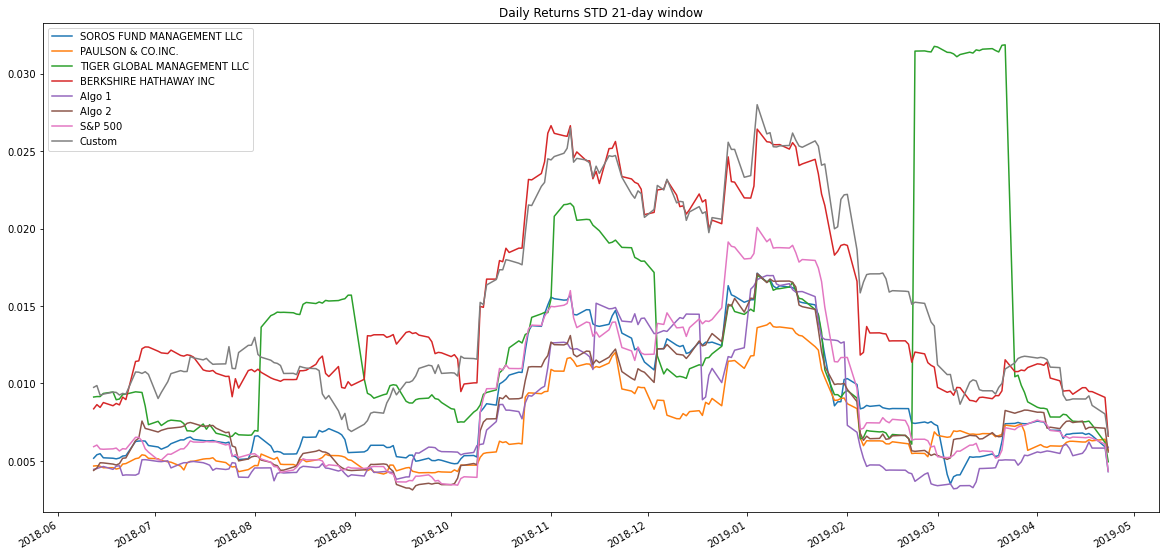

In [64]:
# Calculate rolling standard deviation
daily_returns_rolling_std_21d_1  = daily_returns.rolling(window=21).std()
# Plot the rolling standard deviation
daily_returns_rolling_std_21d_1.plot(figsize=(20,10), title='Daily Returns STD 21-day window')

### Calculate and plot the correlation

<AxesSubplot:>

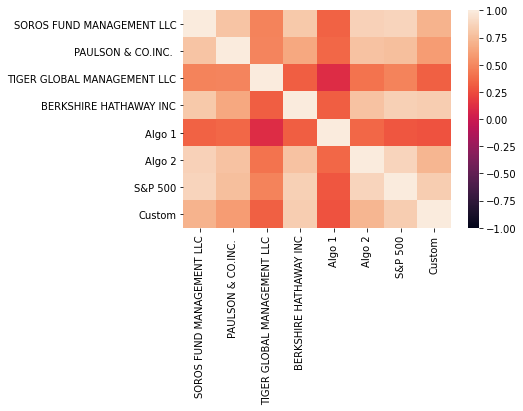

In [65]:
# Calculate and plot the correlation
daily_return_correlation_1 = daily_returns.corr()
sns.heatmap(daily_return_correlation_1, vmin=-1, vmax=1)
#daily_return_correlation_1.plot(figsize=(20,10), title='Daily Returns Correlation')

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:title={'center':'Rolling 60-Day Beta of Custom'}>

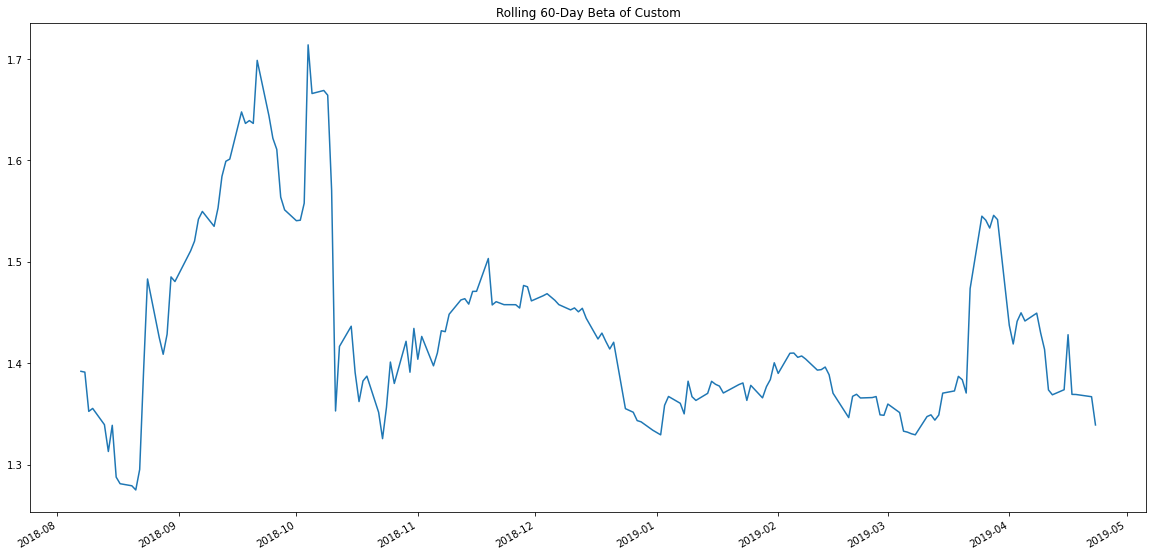

In [67]:
# Calculate and plot Beta
rolling_covariance_1 = daily_returns['Custom'].rolling(window=60).cov(daily_returns['S&P 500'])
rolling_covariance_1

# Calculate variance of S&P 500
rolling_variance_1 = daily_returns['S&P 500'].rolling(window=60).var()
rolling_variance_1

#Computing beta
rolling_beta_1 = rolling_covariance_1 / rolling_variance_1
rolling_beta_1

# Plot beta trend
rolling_beta_1.plot(figsize=(20, 10), title='Rolling 60-Day Beta of Custom')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [70]:
# Calculate Annualzied Sharpe Ratios
sharpe_ratios_1 = (daily_returns.mean() * 252) / (daily_returns.std() * np.sqrt(252))
sharpe_ratios_1

SOROS FUND MANAGEMENT LLC      0.430713
PAULSON & CO.INC.              0.258738
TIGER GLOBAL MANAGEMENT LLC   -1.034216
BERKSHIRE HATHAWAY INC         0.159756
Algo 1                         2.035665
Algo 2                         0.080607
S&P 500                        0.584820
Custom                         0.682686
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratio with Custom Portfolio'}>

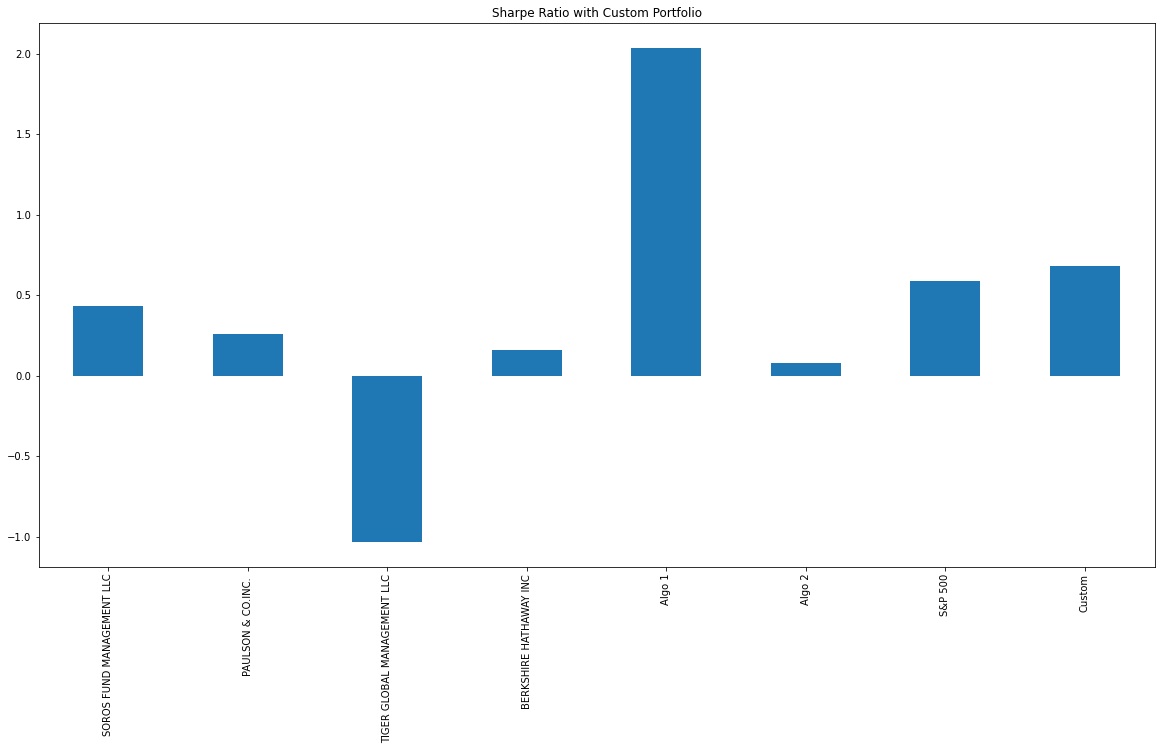

In [73]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios_1.plot(kind='bar',title='Sharpe Ratio with Custom Portfolio',figsize=(20,10))

### How does your portfolio do?

Write your answer here!

---
- Custom (my portfolio) outperformed all portfolios except Algo 1.
---